## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

**OBJETIVO PRINCIPAL**


Crear un modelo de clasificacion para predecir si una persona ganó un premio basado especialmente en alguna de sus caracteristicas demográficas (raza, religion, orientación sexual), con esto, para comprender qué características demográficas tienen un mayor impacto en la predicción del premio ganado.

Esto podria ayudar a identificar patrones o factores que influyen normalmente en la eleccion de los ganadores del Oscar







In [1]:
#Importamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#Configuración
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Cargamos Base
df = pd.read_csv("/content/drive/MyDrive/UCAMP_Ciencia de Datos/Oscars-demographics-DFE.csv",
                 encoding='ISO-8859-1')

In [4]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,_unit_id,_trusted_judgments,birthplace:confidence,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,year_of_award_gold
count,4.410000e+02,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,11.000000
mean,6.704825e+08,7.637188,0.995259,0.996607,0.999130,0.989373,0.992390,1973.165533,0.990082,1977.363636
std,1.139974e+05,19.015541,0.038917,0.032060,0.016438,0.065610,0.049458,24.030895,0.059177,21.592928
min,6.704544e+08,3.000000,0.657100,0.656200,0.657100,0.333300,0.657100,1927.000000,0.333300,1942.000000
25%,6.704545e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1953.000000,1.000000,1964.000000
50%,6.704546e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1973.000000,1.000000,1977.000000
75%,6.704547e+08,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1994.000000,1.000000,1997.000000
max,6.709729e+08,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,2006.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     441 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       441 non-null    object 
 12  religion:confidence            441 non-null    flo

### **Analisis Exploratorio**

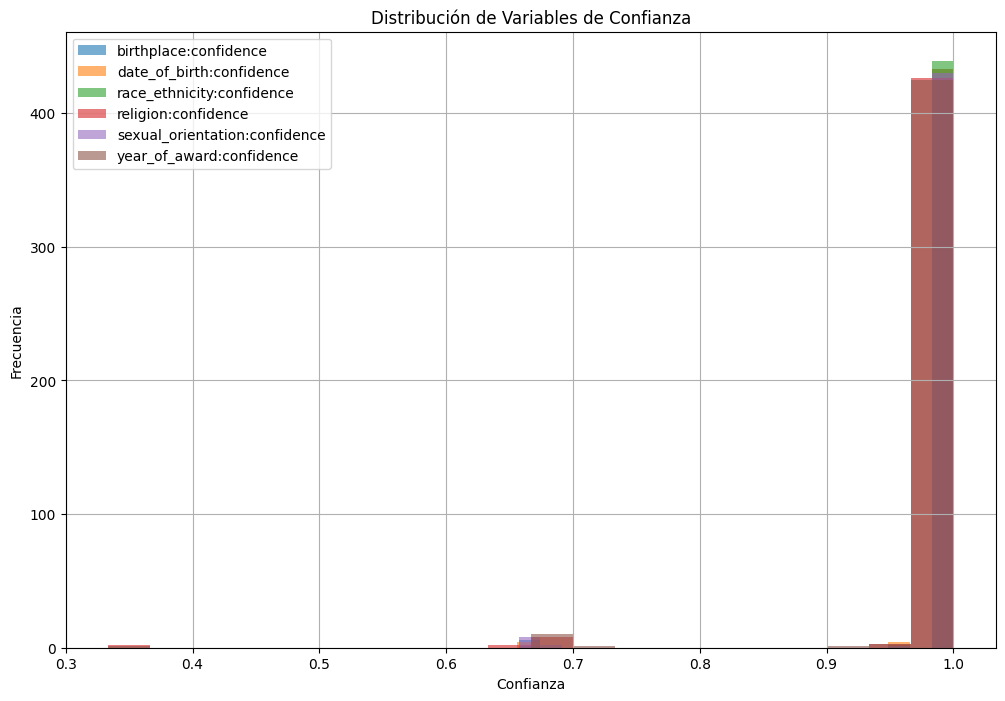

In [7]:
# Variables de confianza
confidence_columns = [
    "birthplace:confidence",
    "date_of_birth:confidence",
    "race_ethnicity:confidence",
    "religion:confidence",
    "sexual_orientation:confidence",
    "year_of_award:confidence"
]

# Creamos un histograma para cada variable de confianza
plt.figure(figsize=(12, 8))
for column in confidence_columns:
    plt.hist(df[column], bins=20, alpha=0.6, label=column)

plt.xlabel('Confianza')
plt.ylabel('Frecuencia')
plt.title('Distribución de Variables de Confianza')
plt.legend()
plt.grid(True)
plt.show()


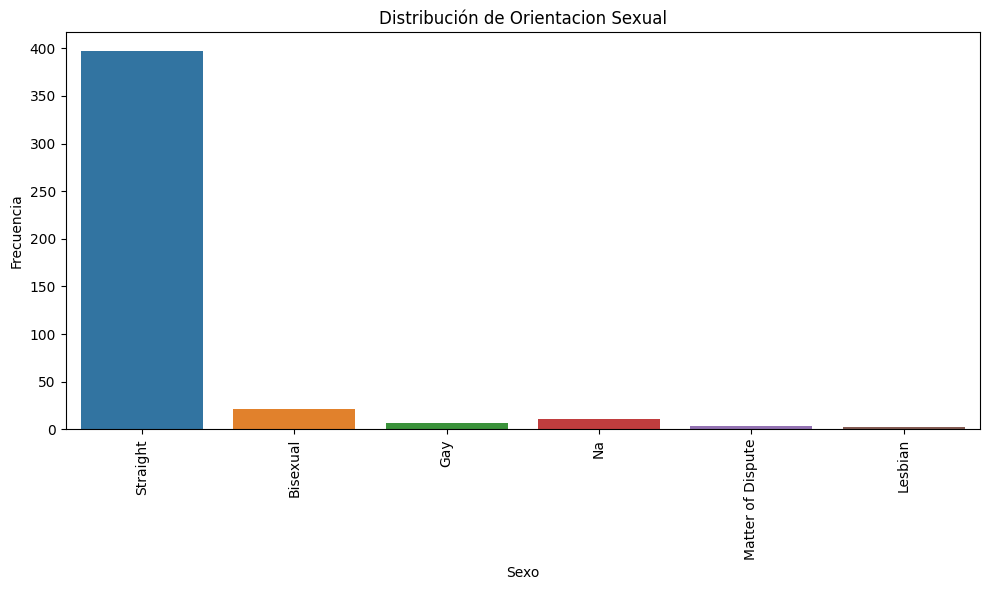

In [8]:
# Graficamos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sexual_orientation')
plt.xticks(rotation=90)
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Orientacion Sexual')
plt.tight_layout()
plt.show()

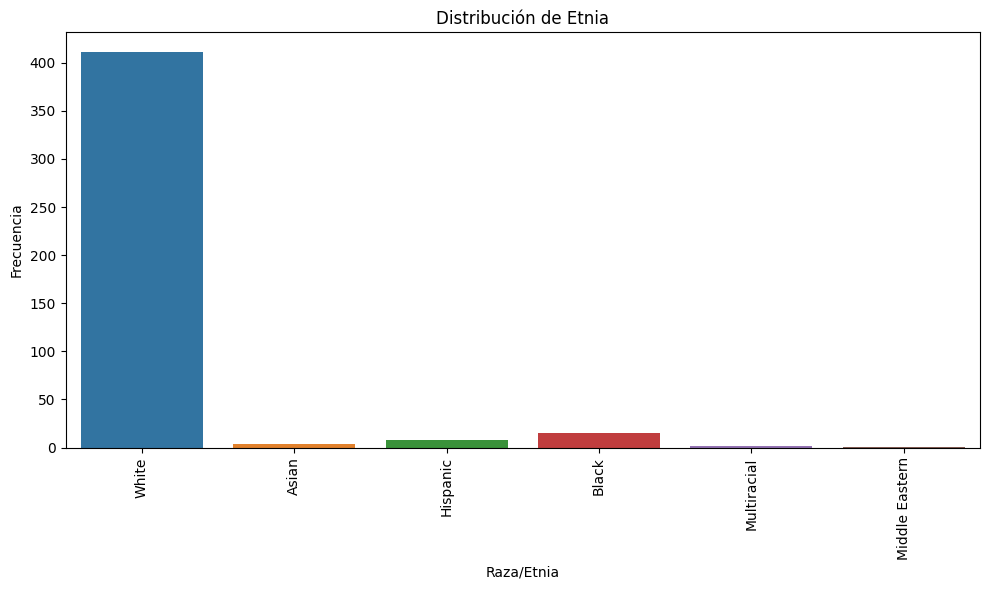

In [9]:
# Graficamos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race_ethnicity')
plt.xticks(rotation=90)
plt.xlabel('Raza/Etnia')
plt.ylabel('Frecuencia')
plt.title('Distribución de Etnia')
plt.tight_layout()
plt.show()

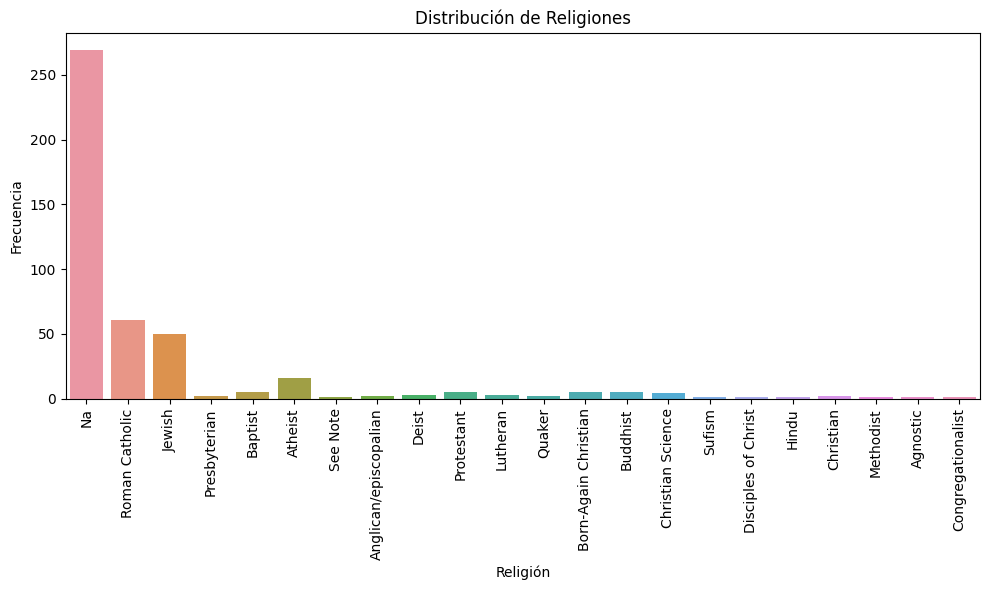

In [10]:
# Graficamos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='religion')
plt.xticks(rotation=90)
plt.xlabel('Religión')
plt.ylabel('Frecuencia')
plt.title('Distribución de Religiones')
plt.tight_layout()
plt.show()

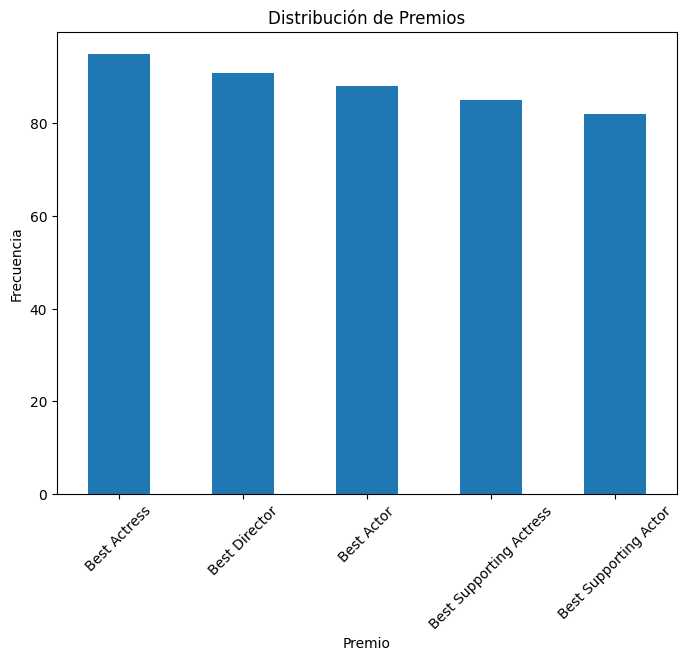

In [11]:
# Graficamos el tipo de premio
plt.figure(figsize=(8, 6))
df['award'].value_counts().plot(kind='bar')
plt.title('Distribución de Premios')
plt.xlabel('Premio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

###**Limpieza de datos**

**Analisis de Completitud**

In [12]:
# Desarrollamos Analisis de Completitud
completitud = pd.DataFrame(df.isnull().sum())
completitud.reset_index(inplace = True)
completitud = completitud.rename(columns = {"index":"columna",0:"total"})
completitud["completitud"] = (1 - completitud["total"] / df.shape[0]) * 100
completitud = completitud.sort_values(by = "completitud", ascending = True)
completitud.reset_index(drop = True, inplace = True)
completitud.head(10)

,columna,total,completitud
0,race_ethnicity_gold,439,0.453515
1,sexual_orientation_gold,438,0.680272
2,date_of_birth_gold,433,1.814059
3,birthplace_gold,432,2.040816
4,religion_gold,431,2.267574
5,year_of_award_gold,430,2.494331
6,_last_judgment_at,25,94.331066
7,person,0,100.000000
8,movie,0,100.000000
9,biourl,0,100.000000


Observamos que, por ejemplo la celda 0, de 441 registros, hay 439 nulos, por lo que -99% son datos faltantes;  no conviene tener variables con un completitud de menor al 80%.

Ademas, todas las variables presentes, tienen el predijo de "_gold" lo que significa que eran datos en la unidad de referencia dorada, información que no nos interesa para el objetivo principal.

In [13]:
#Eliminamos las variables que tienen una completitud menor al 80%
columnas_eliminar = completitud[completitud["completitud"] < 80]["columna"]
df = df.drop(columns=columnas_eliminar)

In [14]:
#Observamos el Cambio
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'birthplace', 'birthplace:confidence',
       'date_of_birth', 'date_of_birth:confidence', 'race_ethnicity',
       'race_ethnicity:confidence', 'religion', 'religion:confidence',
       'sexual_orientation', 'sexual_orientation:confidence', 'year_of_award',
       'year_of_award:confidence', 'award', 'biourl', 'movie', 'person'],
      dtype='object')

**Aplicamos Dummies a variables categoricas**

Las variables categoricas con las que trabajare, son unicas y no tienen ningun orden especifico, por lo que  aplicare un dummie para convertir cada categoría en una nueva columna binaria que indicara si la persona pertenece o no a esa categoria

In [15]:
df = pd.get_dummies(data=df, columns=["race_ethnicity",
                                      "religion",
                                      "sexual_orientation" ])

##### **Aplicar label encoder a nuestra variable objetivo**

In [16]:
# Creamos el LabelEncoder
label_encoder = LabelEncoder()

# Ajustamos y transformamos
df['award_encoded'] = label_encoder.fit_transform(df['award'])

In [17]:
# observamos resultado
unique_df = df[['award', 'award_encoded']].drop_duplicates()
print(unique_df)

                       award  award_encoded
0              Best Director              2
87                Best Actor              0
173    Best Supporting Actor              3
251             Best Actress              1
338  Best Supporting Actress              4


**Aplicamos Datetime a columna Año**

Aun que, ya este registrado como un numero, aplicare a la variable "year_of_award" el datetime, porque, a la hora de entrenar el modelo no quiero que el algoritmo interprete ciertos años con una mayor importancia que otras debido a los numeros asignados, sino, que los identifique con una fecha

In [18]:
# Convertimos 'year_of_award' a columnas de año
df['year_of_award'] = pd.to_datetime(df['year_of_award'], format='%Y').dt.year

#####**Identificamos columnas innecesarias o duplicadas, acorde al objetivo**

*   **_unit_id**: Es el indice que esta dentro de la base

Parecen estar relacionadas con el etiquetado
*   **_golden**: Indica si la entrada es una unidad de referencia dorada en la tarea de etiquetado.
*  **_unit_state**: Estado de la unidad, que podría ser "finalizada", "pendiente" u otro estado.
*  **_trusted_judgments**: Número de jueces confiables que contribuyeron a la evaluación de la unidad.
*  **_last_judgment_at**: Fecha y hora de la última evaluación realizada en la unidad.
*  **biourl**: URL de la biografica del ganador

Eliminamos porque no nos sirven directamente para el cumplimiento del objetivo

* **birthplace**: Lugar de nacimiento del ganador del Oscar.
* **birthplace:confidence**: Nivel de confianza en el lugar de nacimiento.
* **date_of_birth**: Fecha de nacimiento del ganador del Oscar.
* **date_of_birth:confidence**: Nivel de confianza en la fecha de nacimiento.



In [19]:
# Eliminamos columnas innecesarias
df.drop(['_unit_id', '_golden', '_unit_state',
         '_trusted_judgments',"_last_judgment_at","biourl",
        "date_of_birth","date_of_birth:confidence","birthplace:confidence", "birthplace",
         "birthplace:confidence", "sexual_orientation_Na",
         "religion_Na", "award", "movie", "person"], axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   race_ethnicity:confidence             441 non-null    float64
 1   religion:confidence                   441 non-null    float64
 2   sexual_orientation:confidence         441 non-null    float64
 3   year_of_award                         441 non-null    int64  
 4   year_of_award:confidence              441 non-null    float64
 5   race_ethnicity_Asian                  441 non-null    uint8  
 6   race_ethnicity_Black                  441 non-null    uint8  
 7   race_ethnicity_Hispanic               441 non-null    uint8  
 8   race_ethnicity_Middle Eastern         441 non-null    uint8  
 9   race_ethnicity_Multiracial            441 non-null    uint8  
 10  race_ethnicity_White                  441 non-null    uint8  
 11  religion_Agnostic  

In [21]:
df.head(11)

,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,race_ethnicity_Asian,race_ethnicity_Black,race_ethnicity_Hispanic,race_ethnicity_Middle Eastern,race_ethnicity_Multiracial,...,religion_Quaker,religion_Roman Catholic,religion_See Note,religion_Sufism,sexual_orientation_Bisexual,sexual_orientation_Gay,sexual_orientation_Lesbian,sexual_orientation_Matter of Dispute,sexual_orientation_Straight,award_encoded
0,1.0,1.0,1.0000,1927,1.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,1.0,1.0,0.6842,1930,1.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,1.0,1.0,1.0000,1931,0.6667,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,1.0,1.0,1.0000,1932,1.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,1.0,1.0,1.0000,1933,1.0000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
5,1.0,1.0,1.0000,1934,1.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
6,1.0,1.0,1.0000,1935,1.0000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
7,1.0,1.0,1.0000,1936,1.0000,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,2
8,1.0,1.0,1.0000,1937,1.0000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,2
9,1.0,1.0,1.0000,1938,1.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


### **Entrenamiento del modelo**

**RandomForestClassifier**

Dado que estamos trabajando con caracteristicas demográficas como religión, raza y orientación sexual, utilizar un Random Forest puede ser beneficioso, porque, los arboles de decisión pueden manejar facilmente las variables categóricas y sus interacciones, lo que puede ser util para identificar multiples caracteristicas de los ganadores que podrian influir en la probabilidad de ganar un premio


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Utilizamos las caracteristicas confiables del conjunto de datos para el entrenamiento**

In [23]:
# Definimos las caracteristicas (X) y la variable objetivo (y)
X = df.drop(['race_ethnicity:confidence', 'religion:confidence',
             'sexual_orientation:confidence'], axis=1)
y = df['award_encoded']

In [24]:
# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Creaamos y entrenamos el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Predecimos en el conjunto de prueba
y_pred = model.predict(X_test)

In [27]:
# Calculamos precision
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9887640449438202


Los datos de prueba de el modelo han acertado en predecir correctamente la categoria del premio ganado en aproximadamente el 98.88% de los casos

Lo que indica un buen funcionamiento del modelo, sin embargo, corremos el riesgo de un sobreajuste, la capacidad de generalizacion a nuevos datos

Por lo que, realizaremos otras metricas para obtener una comprension mas completa del rendimiento de la clasificacioon que hace el modelo

### **Graficacion y Metricas**

**Matriz de Confusion**

Esta matriz nos ayudara a visualizar la cantidad de predicciones que el modelo ha hecho para cada clase y como esas predicciones se comparan con los valores reales

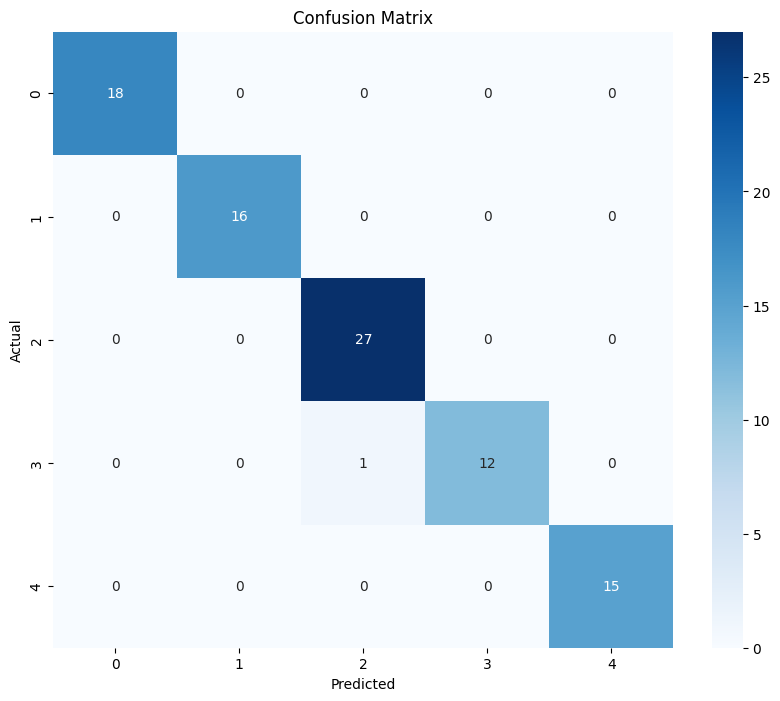

In [28]:
# Creamos matriz de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Cada fila representa la clase real (premio real) y cada columna representa la clase predicha (premio predicho).

Los valores en la matriz indican la cantidad de instancias que fueron clasificadas en cada combinación de clases, por lo que, los resultados son muy prometedores en el modelo, ya que, es capaz de realizar una clasificacion precisa en función de las características demograficas para predecir los premios ganados

**Curva ROC y Area bajo la Curva (AUC-ROC)**

Dado que nuestro modelo esta en una clasificacion binaria, vamos a evaluar su rendimiento para observar la tasa de verdaderos positivos drente a la tasa de falsos

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [30]:
# Binarizamos las etiquetas para el problema multiclase
y_bin = label_binarize(y_test, classes=model.classes_)

In [31]:
# Entrenamos modelo de clasificacion multiclase uno contra todos (OneVsRest)
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [32]:
# Calculamos el AUC-ROC para cada clase
roc_auc = dict()

for i in range(len(model.classes_)):
    roc_auc[i] = roc_auc_score(y_bin[:, i], y_score[:, i])

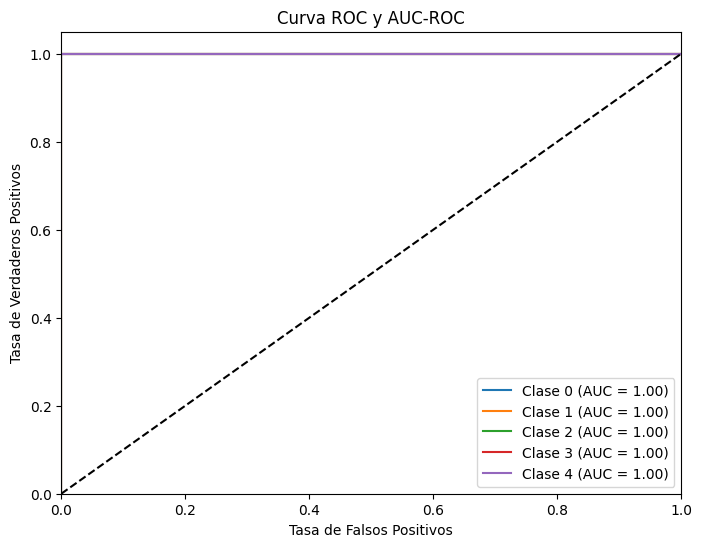

In [33]:
# Plot de la Curva ROC y AUC-ROC
plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC y AUC-ROC')
plt.legend(loc="lower right")
plt.show()

En el contexto de la clasificacion multiclase y en el analisis de las curvas ROC y AUC-ROC, esto generalmente indica que el modelo esta haciendo predicciones casi perfectas para todas las clases, sin embargo es importante realizar otra metrica para comprender de manera completa esta presicion perfecta, para saber como esta clasificando estas muestras

**F1-SCORE**

In [34]:
from sklearn.metrics import f1_score, classification_report
# Predecimos el conjunto de prueba
y_pred = model.predict(X_test)

In [35]:
# Calculamos el F1-score para cada clase
f1_scores = f1_score(y_test, y_pred, average=None)

In [36]:
# Mostramos el F1-score para cada clase
print("F1-Score para cada clase:")
for i, score in enumerate(f1_scores):
    print(f"Clase {i}: {score:.4f}")

F1-Score para cada clase:
Clase 0: 1.0000
Clase 1: 1.0000
Clase 2: 0.9818
Clase 3: 0.9600
Clase 4: 1.0000


**Clases 0, 1 y 4**: En estas clases, el F1-Score es perfecto (1.0000).

**Clase 2 y 3**: El F1-Score es de 0.9818 y 0.960, lo que aún indica un rendimiento muy sólido, siguen siendo una puntuación bastante alta

En general, el modelo esta realizando predicciones perfectamente en términos de precision y sensibilidad para todas los premios.

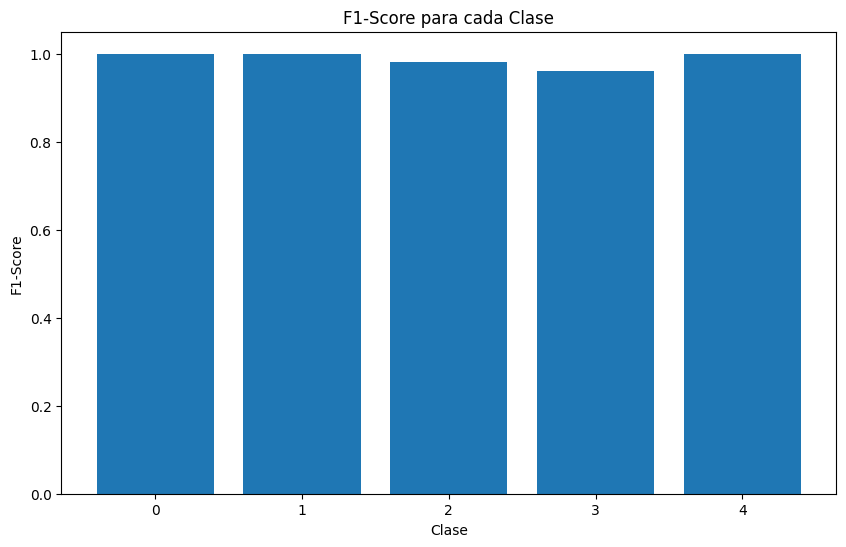

In [37]:
# Plot del F1-score para cada clase
plt.figure(figsize=(10, 6))
plt.bar(range(len(f1_scores)), f1_scores, align='center')
plt.xticks(range(len(f1_scores)), model.classes_)
plt.xlabel('Clase')
plt.ylabel('F1-Score')
plt.title('F1-Score para cada Clase')
plt.show()

**Análisis de importancia de características**

Generamos un gráfico, para resaltar la importancia relativa de cada caracteristica en la prediccion del modelo.

Las caracteristicas más importantes nos diran el impacto que tuvo esa variable a la hora de elegir el ganador del premio Oscar




In [38]:
# Análisis de importancia de características
feature_importances = model.feature_importances_
feature_names = X.columns

In [39]:
# Filtrar las características a eliminar del análisis
features_to_exclude = [
    "award_encoded",
    "year_of_award",
    "race_ethnicity:confidence",
    "religion:confidence",
    "sexual_orientation:confidence",
    "year_of_award:confidence"
]

In [40]:
# Obtener índices de las características a mantener
filtered_feature_indices = [i for i, name in enumerate(feature_names) if name not in features_to_exclude]

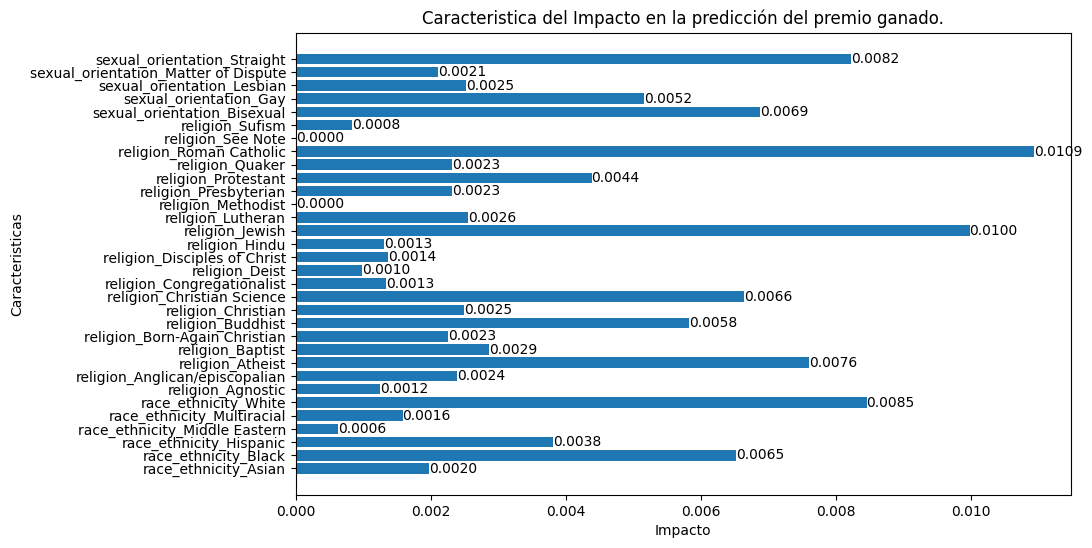

In [41]:
# Filtrar nombres e importancias de características
filtered_feature_names = [feature_names[i] for i in filtered_feature_indices]
filtered_feature_importances = [feature_importances[i] for i in filtered_feature_indices]

plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(filtered_feature_names)), filtered_feature_importances, align="center")
plt.yticks(range(len(filtered_feature_names)), filtered_feature_names)
plt.xlabel("Impacto")
plt.ylabel("Caracteristicas")
plt.title("Caracteristica del Impacto en la predicción del premio ganado.")
# Agregar etiquetas de datos a las barras
for bar, importance in zip(bars, filtered_feature_importances):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f"{importance:.4f}", va='center')

plt.show()


Como se puede observar, identificamos patrones interesantes, que explican  mejor que aspectos demograficos están relacionados con la obtención del premio Oscar. En este sentido, exiten ciertas caracteristicas que tienen una importancia significativamente mayor que otras.

Sin embargo, podemos rescatar que las religiones tienen un impacto más fuerte en la prediccion, por lo que, se puede decir que en esta epoca especialemente, las carasteristicas que influyen para determinar el ganador del premio Oscar es ser:

*  Catolico
*  Judio
*  Blanco
*  Heterosexual

Y caracteristicas que en este sentido hay más prejuicios para que una persona no gane el premio Oscar, especialmente en esa epoca es ser:

* Deista (Creencias en lo logico para la existencia de una deidad)
* Congregacional (Creencia cristiana protestante de manera independiente y autonoma)
* Hindu
* Etnia Multiracial
* Binario o en general de la comunidad LGBTQ






### **API REST**

In [42]:
!pip install flask-ngrok

In [43]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import requests

In [44]:
# Creamos la aplicacion Flask
app = Flask(__name__)
run_with_ngrok(app)  # Exponer la aplicación con ngrok

In [45]:
# Cargamos el modelo previamente entrenado (reemplaza esto con tu modelo)
model = RandomForestClassifier()

In [46]:
# Definimos la ruta para recibir solicitudes POST
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Obtenemo los datos del cuerpo de la solicitud POST
        data = request.json

        # Realizamos la predicción utilizando el modelo cargado
        features = np.array(data['features']).reshape(1, -1)
        prediction = model.predict(features)[0]
        confidence = model.predict_proba(features).max()

        # Preparamos la respuesta JSON con la prediccion y confianza
        response = {'prediction': prediction, 'confidence': confidence}

        return jsonify(response)
    except Exception as e:
        return jsonify({'error': str(e)})


In [47]:
# Iniciamos la aplicacion
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://9ff7-34-91-45-106.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [27/Aug/2023 03:12:11] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2023 03:12:12] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2023 03:13:15] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [27/Aug/2023 03:13:16] "GET /favicon.ico HTTP/1.1" 404 -


In [48]:
# URL de la API expuesta por ngrok (reemplaza con tu enlace público)
api_url = 'https://your-ngrok-link.ngrok.io/predict'

In [49]:
# Datos para la solicitud POST
data = {'features': [feature_values]}  # Reemplaza con los valores de características

NameError: ignored

In [ ]:
# Enviamos la solicitud POST
response = requests.post(api_url, json=data)

In [ ]:
# Obtenemos la respuesta JSON
result = response.json()

In [ ]:
# Mostramos la predicción y la confianza
print('Prediccion:', result['prediction'])
print('Confianza:', result['confidence'])